<a href="https://colab.research.google.com/github/palr17/TestET038A/blob/main/tf_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Machine Learning Tutorial

This tutorial aims to provide a first idea how to implement, train, and evaluate a simple neural network using Tensorflow. We will be using Tensorflow's high-level API: Keras. You can find more information on Keras at https://www.keras.io or on Keras for Tensorflow at https://www.tensorflow.org/guide/keras.

In this tutorial, we will be using an internal dataset of small images to train a simple classification model. Throughout the tutorial, you will follow the basic steps of a typical ML project and see the fundamental functions.



## The dataset

For this tutorial we are using the fashion MNIST dataset. You might have heard about MNIST before, which is a dataset of handwritten numbers (0-9) and is often used as a basic dataset for learning ML. Fashion MNIST follows the same format, but uses images of Fashion items instead of handwritten numbers, which is a considerably harder problem.

The dataset is composed of 70000 grayscale images, each 28 x 28 pixels in size. The dataset contains images of 10 different object, making it a 10-class classification problem.

The first thing we need to do is to load the dataset. As the dataset is already included in keras, this is easily done, as shown below.

In [ ]:
# As we want to use Tensorflow, we of course need to import the Tensorflow module.
import tensorflow as tf

# We then load the fashion MNIST dataset using keras internal function.
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

The loaded dataset is a tuple, including the image and its label. It also is already randomized and split into a training set and a test set (60000 vs 10000 samples). So we do not have to do this manually.

Let us separate these sets and components, and manually split the last 5000 samples of the training set into a validation set.

In [ ]:
# We assign the training and test part of the set to separate variables and separate the images from the labels
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# We keep everything but the last 5000 images as training data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

# The last 5000 samples, we move to a validation set
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Let us have a look at the shape of the data. We can see that each image is a 28 x 28 array. Each value is a uint8 (an 8-bit unsigned integer), which thus has a value of 0-255.

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

Before we create the model, let us do some final adjustments.


1.   We will convert the grayscale values into a range from 0-1 to normalize the data.
2.   We also create a list of what each class type represents.



In [ ]:
# Normalize our data by diving each value by 255
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [ ]:
# Create a list of class names to make it easier to understand what we are looking at
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

In [ ]:
# Numeric label of the first training sample
y_train[0]

9

In [ ]:
# Class name of the first training sample
class_names[y_train[0]]

'Boot'

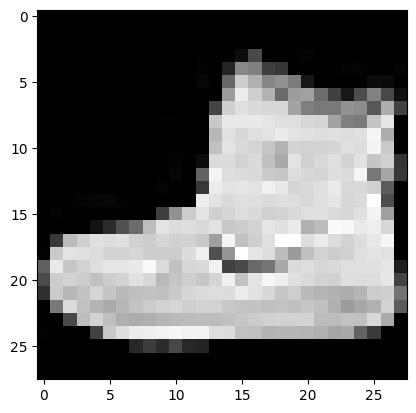

In [ ]:
# Let us also have a look at the corresponding image
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')

## Creating a model with the Sequential API

Now that we have a dataset to work with, we need to define the model that we want to train.

Keras allows to define models in different ways, but one of the simplest and frequently used methods is the so-called Sequential API. This method can be used if we have a single stack of layers that are sequentially connected.

Let us define a neural network with two hidden layers, one containing 300 neurons, and the other containing 100 neurons. As we have a 10-class problem, the output layer should contain 10 neurons.

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let's go through this line by line:


*   The first line defines a seed for the randomization of initial parameters. This makes the results reproducible as the same "random" values will be used every time.
*   In the next line, we create the Sequential model.
*   We then add the first layer (the input layer), which defines the input shape of the data. This also defines how many weights are needed for each neuron in the coming layer.
*   We then use a Flatten layer to convert the 2D arrays into a 1D array. Instead of 28 x 28 pixels, the images are now represented as 1 x 784 pixels. This is necessary because Dense layers expect 1D vectors as inputs.
*   In the next two layes we provide hidden layers. As parameters we provide the number of neurons in the layer (300 and 100, respectively), as well as the activation function to be used. In this case, we use the ReLU function.
*   Finally, the last Dense layer is our output layer. We provide 10 neurons (1 for each class) and use the softmax activation function. This provides us with a probability value for each class.



Instead of adding one layer at a time, we can also provide a list of layers directly when we create the Sequential model. The result is the same and it is up to your personal preference.

The following creates the same model as before:

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Once created, we can use the summary() method to display an overview of the model. The summary shows a list of the model layers (automatically assigning a name if none is provided during creation). It also shows the number of parameters (per layer and total) that have do be trained.

This example shows you that dense layers usally lead to many parameters. With 784 pixels as input, the first layers has 784 x 300 weights and 300 bias values, resulting in 235500 parameters.

In [ ]:
# Show a summary over the created model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

We can also get a list of the model's layers using the layers method and inspect the weights and biases.

In [ ]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_17, built=True>,
 <Dense name=dense_18, built=True>,
 <Dense name=dense_19, built=True>]

In [ ]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 2.8993405e-02,  2.3139901e-02,  5.7795316e-02, ...,
        -4.4160567e-02,  6.5438226e-02, -2.9125307e-02],
       [ 3.9382964e-02,  3.3842675e-02, -6.4168513e-02, ...,
         5.7488069e-02,  3.4504399e-02,  5.3135052e-02],
       [-7.4415654e-04, -1.6630054e-02,  1.7108411e-02, ...,
        -4.3466523e-02,  6.5734982e-02,  3.9876185e-02],
       ...,
       [-2.5021125e-02, -6.2149309e-02,  3.0268781e-02, ...,
        -4.5484737e-02,  2.5186263e-02,  2.5679618e-03],
       [ 6.7878336e-02,  4.0364191e-02, -3.7635967e-02, ...,
         2.4163425e-02,  2.0873338e-02,  2.1077536e-02],
       [ 5.8721900e-03, -4.8143409e-02,  6.5505505e-05, ...,
        -2.7850203e-02,  6.3508824e-02,  5.3258061e-02]], dtype=float32)

## Compiling the model

Now that we have defined the model, we need to specify a few things before we can train it. To do this we use the compile() method. The most important parts in this are the loss function, the optimizer, and the metrics to be used.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

The reason for using "sparse_categorical_crossentroty" loss is because we have sparse labels. This means for each target we only define which one is the correct one as classes are exclusive. An alternative way would be to provide the probability for each class value as a list. In this case, we can use "categorical_crossentropy" as the loss function.

"sgd" defines that we use an optimizer called "Stochastic Gradient Descent". In this definition we use its default learning rate. But we could provide a specific learning rate by using "optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)" instead.

Finally we define that we measure the model accuracy during training.

## Training the model

It is time to train the model. For this we use the fit() method.

We have to provide the data it should be trained on, the data used for validation, as well as for how long we should train the model. This is defined as epochs, where one epoch is one iteration of optimizing the model parameters.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7862 - loss: 0.6102 - val_accuracy: 0.8332 - val_loss: 0.4249
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8633 - loss: 0.3766 - val_accuracy: 0.8436 - val_loss: 0.4018
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8762 - loss: 0.3318 - val_accuracy: 0.8460 - val_loss: 0.4088
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8862 - loss: 0.3049 - val_accuracy: 0.8574 - val_loss: 0.3856
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8951 - loss: 0.2832 - val_accuracy: 0.8584 - val_loss: 0.3840
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8995 - loss: 0.2671 - val_accuracy: 0.8648 - val_loss: 0.3809
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9042 - loss: 0.2531 - val_accuracy: 0.8714 - val_loss: 0.3624
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9087 - loss: 0.2

## Evaluating the model

Already during the training process, we can see a couple of values that help us to determine how the model is doing. After each epoch, we see the current training accuracy (i.e., how well does the model perform on the training set), as well as teh validation accuracy (i.e., how well does the model perform on some new data). Accuracy increases during training, which is a good sign. After the last epoch, the training accuracy is lightly higher than the validation accuracy, which means that there is some overfitting, but not too bad.

The fit method returns a History object, which contains the training parameters, the epochs, and the metrics that were measured at the end of each epoch.

We can use the latter to plot the learning curve.

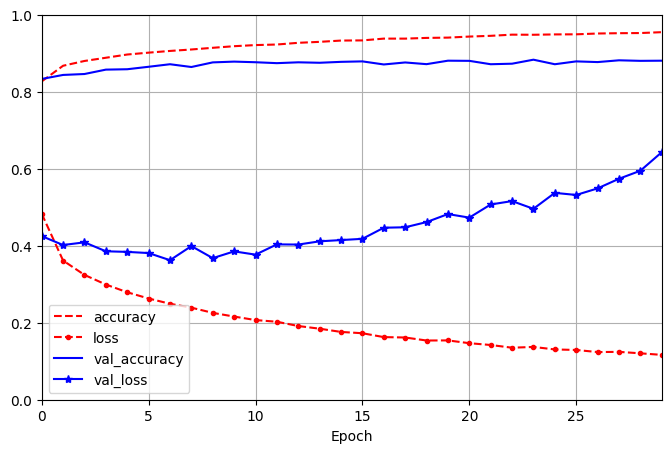

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

To evaluate the model on the final test set, we use the evaluate() method. As parameters we just provide the test set.

Remember that this is only for your final evaluation. This performance estimation should never be used to further tweak the model.

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8776 - loss: 0.6478


[0.6751046180725098, 0.8766999840736389]

The model also has a predict() method that we can use to make predictions with the newly generated model.

As we have used all our data, we can just use some samples to make a prediction.

In [ ]:
# Take the first three samples of the test set as our "new" data
X_new = X_test[:3]
# Make predictions for these three values
y_result = model.predict(X_new)
# Show the results (rounded to two decimals)
y_result.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The result is a list of class probabilities.

Let us convert this into single class predictions:

In [ ]:
import numpy as np

y_pred = y_result.argmax(axis=-1)
np.array(class_names)[y_pred]

array(['Boot', 'Pullover', 'Trouser'], dtype='<U8')

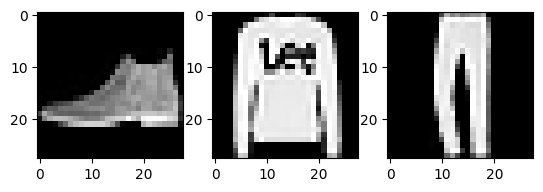

In [ ]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(X_new[0], cmap='gray')
axarr[1].imshow(X_new[1], cmap='gray')
axarr[2].imshow(X_new[2], cmap='gray')

## Saving the model

We can save the model in different formats for reuse at a later time.

In [ ]:
model.save("my_model.keras")

In [ ]:
model = tf.keras.models.load_model("my_model.keras")

## Optimizing your model

There are a number of hyperparameters that can be tuned to improve the model performance. This can be done manually or in a more automated manner.

Try for example to change the learning rate or the network configuration and see how it affects the performance of the model on the validation set (do not optimize to improve the test set).

There are a number of ways to automate parameter optimization. Keras has its own tool named Keras Tuner. It uses an optimization algorithm to fine tune the hyperparameters.